In [1]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stay-or-stray/sample_submission.csv
/kaggle/input/stay-or-stray/log_train.csv
/kaggle/input/stay-or-stray/log_test.csv
/kaggle/input/stay-or-stray/train.csv
/kaggle/input/stay-or-stray/test.csv


**Importing Data**

In [2]:
train = pd.read_csv("/kaggle/input/stay-or-stray/train.csv")
test = pd.read_csv("/kaggle/input/stay-or-stray/test.csv")

logs_train = pd.read_csv("/kaggle/input/stay-or-stray/log_train.csv")
logs_test = pd.read_csv("/kaggle/input/stay-or-stray/log_test.csv")

In [3]:
print(train.shape)
print(logs_train.shape)

(84377, 141)
(5710093, 5)


In [4]:
train.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,7054.0,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,...,0.0,NaN,NaN,1.0,1.0,1.0,3.0,2.0,NaN,1
1,147131.0,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,...,NaN,NaN,0.0,3.0,1.0,1.0,2.0,10.0,NaN,1
2,132068.0,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,...,NaN,NaN,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
3,85195.0,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,...,NaN,NaN,0.0,2.0,2.0,1.0,4.0,2.0,NaN,1
4,191948.0,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,...,0.0,0.0,NaN,2.0,2.0,1.0,2.0,6.0,0.0,1


In [5]:
logs_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710093 entries, 0 to 5710092
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   ID      int64 
 1   time    object
 2   source  object
 3   event   object
 4   object  object
dtypes: int64(1), object(4)
memory usage: 217.8+ MB


In [6]:
logs_train.head()

,ID,time,source,event,object
0,43980,2013-11-11T16:30:11,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
1,2648,2013-12-27T06:44:08,browser,access,UaqaZdJXEAHfzB9qbZkvAe2jc0xmI3Na
2,18588,2013-12-07T09:58:44,server,navigate,l0kj1vWrjGxi2YqQWGitPXDEoH5G5RYd
3,2679,2014-01-05T13:51:34,browser,access,S64EUU2p7wiyAtSxjzfSS6jLaHB3Y9RJ
4,2528,2013-12-17T12:09:36,server,access,DSPbj5O8mNBS0ccEiBGXnXJvTZstHNED


In [7]:
logs_train['time'] = pd.to_datetime(logs_train['time'])

In [8]:
logs_train['year']=logs_train['time'].dt.year

In [9]:
logs_train['month']=logs_train['time'].dt.month

In [10]:
logs_train['day']=logs_train['time'].dt.day

In [11]:
max(logs_train['time'])

Timestamp('2014-08-01 17:31:15')

In [12]:
six_months_ago = max(logs_train['time']) - pd.DateOffset(months=3)

In [13]:
six_months_ago

Timestamp('2014-05-01 17:31:15')

In [14]:
print(test.shape)
print(logs_test.shape)

(35982, 140)
(2447184, 5)


In [15]:
test.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X130,X131,X132,X133,X134,X135,X136,X137,X138,X139
0,17547.0,1.272727,0.0,1.0,0.0,3.0,0.0,0.0,7.0,26.0,...,NaN,NaN,NaN,0.0,2.0,6.0,2.0,4.0,3.0,NaN
1,140449.0,1.000000,0.0,1.0,NaN,1.0,NaN,0.0,8.0,4.0,...,0.0,0.0,NaN,0.0,3.0,2.0,2.0,2.0,5.0,NaN
2,182658.0,2.000000,NaN,2.0,NaN,2.0,NaN,0.0,64.0,2.0,...,NaN,NaN,NaN,NaN,2.0,4.0,1.0,1.0,7.0,0.0
3,149652.0,1.000000,0.0,1.0,NaN,1.0,0.0,0.0,9.0,9.0,...,NaN,NaN,NaN,NaN,3.0,1.0,1.0,2.0,7.0,NaN
4,106304.0,2.000000,NaN,2.0,NaN,3.0,NaN,0.0,1.0,6.0,...,NaN,NaN,NaN,0.0,1.0,2.0,2.0,2.0,2.0,0.0


In [16]:
logs_test.head()

,ID,time,source,event,object
0,116554,2014-01-06T05:08:08,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
1,19439,2013-12-08T06:03:08,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
2,107141,2013-11-26T11:15:18,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl
3,82090,2013-12-12T15:18:20,browser,video,vfBDLKTN9uOeruSh4LLBed14yLpyrqK8
4,86668,2013-11-25T13:30:39,server,access,raFEun0hpOJkjudwgs8gbTqL7ZxOMVZ1


In [17]:
logs_test['time'] = pd.to_datetime(logs_test['time'])
logs_test['year']=logs_test['time'].dt.year
logs_test['month']=logs_test['time'].dt.month
logs_test['day']=logs_test['time'].dt.day
six_months_ago_test = max(logs_test['time']) - pd.DateOffset(months=3)

In [18]:
logs_test.head()

,ID,time,source,event,object,year,month,day
0,116554,2014-01-06 05:08:08,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl,2014,1,6
1,19439,2013-12-08 06:03:08,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl,2013,12,8
2,107141,2013-11-26 11:15:18,browser,page_close,3T6XwoiMKgol57cm29Rjy8FXVFcIomxl,2013,11,26
3,82090,2013-12-12 15:18:20,browser,video,vfBDLKTN9uOeruSh4LLBed14yLpyrqK8,2013,12,12
4,86668,2013-11-25 13:30:39,server,access,raFEun0hpOJkjudwgs8gbTqL7ZxOMVZ1,2013,11,25


In [19]:
###changing data type
train['ID']=train['ID'].astype('str').replace('\.0', '', regex=True)

In [20]:
###changing data type
test['ID']=test['ID'].astype('str').replace('\.0', '', regex=True)

In [21]:
##changing data type
logs_train['ID']=logs_train['ID'].astype('str')
logs_test['ID']=logs_test['ID'].astype('str')

*Counting No of Students *

In [22]:
print(train['ID'].nunique())
print(logs_train['ID'].nunique())

83913
114469


In [23]:
print(test['ID'].nunique())
print(logs_test['ID'].nunique())

35982
101910


Creating Pivot table for train logs

In [24]:
logs_train['event'].value_counts()/len(logs_train)*100

event
access        38.164265
problem       15.470466
page_close    15.157687
navigate      12.371322
video          9.767879
discussion     7.957471
wiki           1.110910
Name: count, dtype: float64

In [25]:
logs_train['source'].value_counts()/len(logs_train)*100

source
server     52.558408
browser    47.441592
Name: count, dtype: float64

In [26]:
train['label'].value_counts()/len(train)*100

label
1    79.272788
0    20.727212
Name: count, dtype: float64

In [27]:
logs_train['object'].nunique()

5832

In [28]:
##filter for page_close
table1=logs_train[logs_train['event']=='page_close'].groupby(['ID'])[['time']].nunique().reset_index()
table2=logs_train[logs_train['event']=='access'].groupby(['ID'])[['time']].nunique().reset_index()
table3=logs_train[logs_train['event']=='navigate'].groupby(['ID'])[['time']].nunique().reset_index()
table4=logs_train[logs_train['event']=='video'].groupby(['ID'])[['time']].nunique().reset_index()
table5=logs_train[logs_train['event']=='problem'].groupby(['ID'])[['time']].nunique().reset_index()
table6=logs_train[logs_train['event']=='discussion'].groupby(['ID'])[['time']].nunique().reset_index()
table7=logs_train[logs_train['event']=='wiki'].groupby(['ID'])[['time']].nunique().reset_index()
table8=logs_train[logs_train['source']=='server'].groupby(['ID'])[['time']].nunique().reset_index()
table9=logs_train[logs_train['source']=='browser'].groupby(['ID'])[['time']].nunique().reset_index()


In [29]:
table10=logs_train[logs_train['time']> six_months_ago].groupby(['ID'])[['time']].nunique().reset_index()

In [30]:
table10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74128 entries, 0 to 74127
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      74128 non-null  object
 1   time    74128 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [31]:
table11=logs_test[logs_test['event']=='page_close'].groupby(['ID'])[['time']].nunique().reset_index()
table12=logs_test[logs_test['event']=='access'].groupby(['ID'])[['time']].nunique().reset_index()
table13=logs_test[logs_test['event']=='navigate'].groupby(['ID'])[['time']].nunique().reset_index()
table14=logs_test[logs_test['event']=='video'].groupby(['ID'])[['time']].nunique().reset_index()
table15=logs_test[logs_test['event']=='problem'].groupby(['ID'])[['time']].nunique().reset_index()
table16=logs_test[logs_test['event']=='discussion'].groupby(['ID'])[['time']].nunique().reset_index()
table17=logs_test[logs_test['event']=='wiki'].groupby(['ID'])[['time']].nunique().reset_index()
table18=logs_test[logs_test['source']=='server'].groupby(['ID'])[['time']].nunique().reset_index()
table19=logs_test[logs_test['source']=='browser'].groupby(['ID'])[['time']].nunique().reset_index()

In [32]:
table20=logs_test[logs_test['time']> six_months_ago_test].groupby(['ID'])[['time']].nunique().reset_index()

In [33]:
table20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65259 entries, 0 to 65258
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      65259 non-null  object
 1   time    65259 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1019.8+ KB


*Joining with train and test data*

In [34]:
train.iloc[:,[0,1,2,3,4]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84377 entries, 0 to 84376
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      84377 non-null  object 
 1   X1      83959 non-null  float64
 2   X2      25179 non-null  float64
 3   X3      83946 non-null  float64
 4   X4      25131 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.2+ MB


In [35]:
logs_train.iloc[:,[0,1,2,3]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5710093 entries, 0 to 5710092
Data columns (total 4 columns):
 #   Column  Dtype         
---  ------  -----         
 0   ID      object        
 1   time    datetime64[ns]
 2   source  object        
 3   event   object        
dtypes: datetime64[ns](1), object(3)
memory usage: 174.3+ MB


In [36]:
train.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X131,X132,X133,X134,X135,X136,X137,X138,X139,label
0,7054,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,...,0.0,NaN,NaN,1.0,1.0,1.0,3.0,2.0,NaN,1
1,147131,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,...,NaN,NaN,0.0,3.0,1.0,1.0,2.0,10.0,NaN,1
2,132068,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,...,NaN,NaN,0.0,1.0,1.0,2.0,2.0,4.0,NaN,1
3,85195,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,...,NaN,NaN,0.0,2.0,2.0,1.0,4.0,2.0,NaN,1
4,191948,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,...,0.0,0.0,NaN,2.0,2.0,1.0,2.0,6.0,0.0,1


In [37]:
train.shape

(84377, 141)

In [38]:
train_new=pd.merge(train, table1, on='ID', how='left')
train_new.rename(columns={'time':'page_close'},inplace=True)
train_new=pd.merge(train_new, table2, on='ID', how='left')
train_new.rename(columns={'time':'access'},inplace=True)
train_new=pd.merge(train_new, table3, on='ID', how='left')
train_new.rename(columns={'time':'navigate'},inplace=True)
train_new=pd.merge(train_new, table4, on='ID', how='left')
train_new.rename(columns={'time':'video'},inplace=True)
train_new=pd.merge(train_new, table5, on='ID', how='left')
train_new.rename(columns={'time':'problem'},inplace=True)
train_new=pd.merge(train_new, table6, on='ID', how='left')
train_new.rename(columns={'time':'discussion'},inplace=True)
train_new=pd.merge(train_new, table7, on='ID', how='left')
train_new.rename(columns={'time':'wiki'},inplace=True)
train_new=pd.merge(train_new, table8, on='ID', how='left')
train_new.rename(columns={'time':'server'},inplace=True)
train_new=pd.merge(train_new, table9, on='ID', how='left')
train_new.rename(columns={'time':'browser'},inplace=True)
train_new=pd.merge(train_new, table10, on='ID', how='left')
train_new.rename(columns={'time':'accessed_in_last_6_mnths'},inplace=True)

In [39]:
train_new.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,page_close,access,navigate,video,problem,discussion,wiki,server,browser,accessed_in_last_6_mnths
0,7054,2.015152,0.0,32.0,NaN,4.0,NaN,NaN,7.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,147131,1.000000,NaN,2.0,NaN,NaN,0.0,NaN,6.0,5.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0
2,132068,1.000000,NaN,1.0,NaN,2.0,NaN,0.0,9.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,85195,2.071429,0.0,1.0,NaN,2.0,NaN,NaN,8.0,7.0,...,10.0,14.0,5.0,9.0,1.0,NaN,1.0,16.0,19.0,30.0
4,191948,2.000000,NaN,2.0,0.0,2.0,NaN,NaN,14.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
train_new.shape

(84377, 151)

In [41]:
test_new=pd.merge(test, table11, on='ID', how='left')
test_new.rename(columns={'time':'page_close'},inplace=True)
test_new=pd.merge(test_new, table12, on='ID', how='left')
test_new.rename(columns={'time':'access'},inplace=True)
test_new=pd.merge(test_new, table13, on='ID', how='left')
test_new.rename(columns={'time':'navigate'},inplace=True)
test_new=pd.merge(test_new, table14, on='ID', how='left')
test_new.rename(columns={'time':'video'},inplace=True)
test_new=pd.merge(test_new, table15, on='ID', how='left')
test_new.rename(columns={'time':'problem'},inplace=True)
test_new=pd.merge(test_new, table16, on='ID', how='left')
test_new.rename(columns={'time':'discussion'},inplace=True)
test_new=pd.merge(test_new, table17, on='ID', how='left')
test_new.rename(columns={'time':'wiki'},inplace=True)
test_new=pd.merge(test_new, table18, on='ID', how='left')
test_new.rename(columns={'time':'server'},inplace=True)
test_new=pd.merge(test_new, table19, on='ID', how='left')
test_new.rename(columns={'time':'browser'},inplace=True)
test_new=pd.merge(test_new, table20, on='ID', how='left')
test_new.rename(columns={'time':'accessed_in_last_6_mnths'},inplace=True)

In [42]:
test_new.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,page_close,access,navigate,video,problem,discussion,wiki,server,browser,accessed_in_last_6_mnths
0,17547,1.272727,0.0,1.0,0.0,3.0,0.0,0.0,7.0,26.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0
1,140449,1.000000,0.0,1.0,NaN,1.0,NaN,0.0,8.0,4.0,...,NaN,NaN,2.0,NaN,NaN,2.0,NaN,4.0,NaN,NaN
2,182658,2.000000,NaN,2.0,NaN,2.0,NaN,0.0,64.0,2.0,...,NaN,NaN,1.0,1.0,NaN,NaN,NaN,1.0,1.0,2.0
3,149652,1.000000,0.0,1.0,NaN,1.0,0.0,0.0,9.0,9.0,...,NaN,NaN,3.0,NaN,NaN,2.0,NaN,5.0,NaN,5.0
4,106304,2.000000,NaN,2.0,NaN,3.0,NaN,0.0,1.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
test_new.shape

(35982, 150)

In [44]:
train_new.columns.to_list()
list_cols=[]
for i in range(len(train_new.columns.to_list())):
   x=train_new.iloc[:,i].isna().sum()/len(train_new)*100
   if (train_new.iloc[:,i].isna().sum()/len(train_new)*100)>50:
          print(f'drop columns number',i,"with",x,"null values")
   else:
          list_cols.append(i)


drop columns number 2 with 70.158929566114 null values
drop columns number 4 with 70.21581710655748 null values
drop columns number 6 with 70.20870616400204 null values
drop columns number 7 with 70.04870995650474 null values
drop columns number 18 with 70.08663498346705 null values
drop columns number 19 with 70.26085307607524 null values
drop columns number 20 with 70.13759673844768 null values
drop columns number 21 with 69.98352631641323 null values
drop columns number 22 with 70.03804354267157 null values
drop columns number 23 with 70.26085307607524 null values
drop columns number 24 with 70.09848655439278 null values
drop columns number 38 with 70.16841082285457 null values
drop columns number 39 with 69.85434419332283 null values
drop columns number 40 with 70.23477962003864 null values
drop columns number 46 with 70.12100453915167 null values
drop columns number 51 with 70.314185145241 null values
drop columns number 53 with 70.25374213351981 null values
drop columns number 54

In [45]:
len(list_cols)

94

In [46]:
train_new1=train_new.iloc[:,list_cols]

In [47]:
test_cols=train_new1.drop('label',axis=1).columns.to_list()

In [48]:
test_new1=test_new[test_cols]

In [49]:
train_new1.head()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X127,X128,X134,X135,X136,X137,X138,label,navigate,server
0,7054,2.015152,32.0,4.0,7.0,6.0,2.0,5.0,2.0,15.0,...,18.0,13.0,1.0,1.0,1.0,3.0,2.0,1,NaN,NaN
1,147131,1.000000,2.0,NaN,6.0,5.0,8.0,4.0,7.0,12.0,...,9.0,4.0,3.0,1.0,1.0,2.0,10.0,1,1.0,1.0
2,132068,1.000000,1.0,2.0,9.0,1.0,7.0,10.0,7.0,17.0,...,2.0,1.0,1.0,1.0,2.0,2.0,4.0,1,NaN,NaN
3,85195,2.071429,1.0,2.0,8.0,7.0,9.0,4.0,18.0,8.0,...,12.0,12.0,2.0,2.0,1.0,4.0,2.0,1,5.0,16.0
4,191948,2.000000,2.0,2.0,14.0,2.0,2.0,4.0,4.0,3.0,...,14.0,3.0,2.0,2.0,1.0,2.0,6.0,1,NaN,NaN


In [50]:
train_new1.shape

(84377, 94)

In [51]:
test_new1.head()

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X126,X127,X128,X134,X135,X136,X137,X138,navigate,server
0,17547,1.272727,1.0,3.0,7.0,26.0,48.0,8.0,8.0,9.0,...,1.0,19.0,42.0,2.0,6.0,2.0,4.0,3.0,1.0,1.0
1,140449,1.000000,1.0,1.0,8.0,4.0,5.0,3.0,1.0,6.0,...,1.0,17.0,3.0,3.0,2.0,2.0,2.0,5.0,2.0,4.0
2,182658,2.000000,2.0,2.0,64.0,2.0,7.0,8.0,14.0,19.0,...,1.0,16.0,12.0,2.0,4.0,1.0,1.0,7.0,1.0,1.0
3,149652,1.000000,1.0,1.0,9.0,9.0,10.0,1.0,15.0,19.0,...,1.0,16.0,3.0,3.0,1.0,1.0,2.0,7.0,3.0,5.0
4,106304,2.000000,2.0,3.0,1.0,6.0,4.0,2.0,4.0,4.0,...,1.0,7.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,NaN


In [52]:
test_new1.shape

(35982, 93)

**Handling Missing values **

In [53]:
train_new_X=train_new1.drop(['label','ID'],axis=1)
test_new_X=test_new1.drop(['ID'],axis=1)

In [54]:
print(train_new_X.shape)
test_new_X.shape

(84377, 92)


(35982, 92)

In [55]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean')
train_imputed=imputer.fit_transform(train_new_X)

In [56]:
test_imputed=imputer.fit_transform(test_new_X)

In [57]:
train_imputed=pd.DataFrame(train_imputed,columns=train_new_X.columns.to_list())

In [58]:
train_imputed.shape

(84377, 92)

In [59]:
test_imputed=pd.DataFrame(test_imputed,columns=test_new_X.columns.to_list())

In [60]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
train_norm=scaler.fit_transform(train_imputed)

In [61]:
test_norm=scaler.fit_transform(test_imputed)

In [62]:
train_norm=pd.DataFrame(train_norm,columns=train_imputed.columns.to_list())

In [63]:
test_norm=pd.DataFrame(test_norm,columns=test_imputed.columns.to_list())

In [64]:
train_norm.head()

,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,...,X126,X127,X128,X134,X135,X136,X137,X138,navigate,server
0,0.169192,0.008602,0.250000,0.012346,0.011161,0.00271,0.005057,0.002404,0.021472,0.025381,...,0.0,0.032075,0.003296,0.000000,0.000000,0.000000,0.027778,0.034483,0.011388,0.006669
1,0.000000,0.000277,0.075564,0.010288,0.008929,0.01897,0.003793,0.014423,0.016871,0.000000,...,0.0,0.015094,0.000824,0.024390,0.000000,0.000000,0.013889,0.310345,0.000000,0.000000
2,0.000000,0.000000,0.083333,0.016461,0.000000,0.01626,0.011378,0.014423,0.024540,0.003384,...,0.0,0.001887,0.000000,0.000000,0.000000,0.012346,0.013889,0.103448,0.011388,0.006669
3,0.178571,0.000000,0.083333,0.014403,0.013393,0.02168,0.003793,0.040865,0.010736,0.006768,...,0.0,0.020755,0.003021,0.012195,0.011628,0.000000,0.041667,0.034483,0.008529,0.004307
4,0.166667,0.000277,0.083333,0.026749,0.002232,0.00271,0.003793,0.007212,0.003067,0.010152,...,0.0,0.024528,0.000549,0.012195,0.011628,0.000000,0.013889,0.172414,0.011388,0.006669


In [65]:
test_norm.head()

,X1,X3,X5,X8,X9,X10,X11,X12,X13,X14,...,X126,X127,X128,X134,X135,X136,X137,X138,navigate,server
0,0.090909,0.000000,0.181818,0.004040,0.052083,0.149682,0.012750,0.016018,0.023324,0.098592,...,0.0,0.093264,0.011688,0.021277,0.075758,0.019608,0.069767,0.086957,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.004714,0.006250,0.012739,0.003643,0.000000,0.014577,0.002817,...,0.0,0.082902,0.000570,0.042553,0.015152,0.019608,0.023256,0.173913,0.010753,0.004380
2,0.333333,0.001049,0.090909,0.042424,0.002083,0.019108,0.012750,0.029748,0.052478,0.008451,...,0.0,0.077720,0.003136,0.021277,0.045455,0.000000,0.000000,0.260870,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.005387,0.016667,0.028662,0.000000,0.032037,0.052478,0.011268,...,0.0,0.077720,0.000570,0.042553,0.000000,0.000000,0.023256,0.260870,0.021505,0.005839
4,0.333333,0.001049,0.181818,0.000000,0.010417,0.009554,0.001821,0.006865,0.008746,0.047887,...,0.0,0.031088,0.000000,0.000000,0.015152,0.019608,0.023256,0.043478,0.027021,0.016485


Correlation Matrix

In [66]:
train_corr=pd.concat([train_norm,train_new1['label']],axis=1)

In [67]:
corr_list=[]
cols=train_corr.columns.to_list()
for i in range(len(train_corr.columns.to_list())):
  correlation = train_corr.iloc[:,i].corr(train_corr['label'])
  corr_list.append(correlation)

print(corr_list)

[-0.06404756921916885, -0.28494242130883346, -0.04459837779008885, -0.14067299648852727, -0.15340546083651974, -0.14160920100740348, -0.1244459387186772, -0.11221269981027461, -0.10853552327215428, -0.11776253992776277, -0.15452589332393743, -0.15585897029723697, -0.43843728297524825, -0.1507509126503846, -0.15913456231662318, -0.16200284859140351, -0.1682123261044757, -0.16227912938622602, -0.13662257992912408, -0.13013680552332446, -0.12726896125210943, -0.1325281189012514, -0.13439338011049648, -0.2249470285393465, -0.16729467315686528, -0.32340374435260005, -0.3025852559478819, -0.2778692220200997, -0.28789548325281994, -0.1689006870921307, -0.3054417080379066, -0.2973509867476671, -0.2988126614973096, -0.46733885816478016, -0.027312442236019373, -0.2833722651963051, -0.515309160269356, -0.4254818244432893, -0.0027533111028222785, -0.02760308013995292, -0.038711393362031145, -0.03997322724255825, -0.08334755628448504, -0.5309211304858069, -0.24576285238039192, -0.2554936664966142, 

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

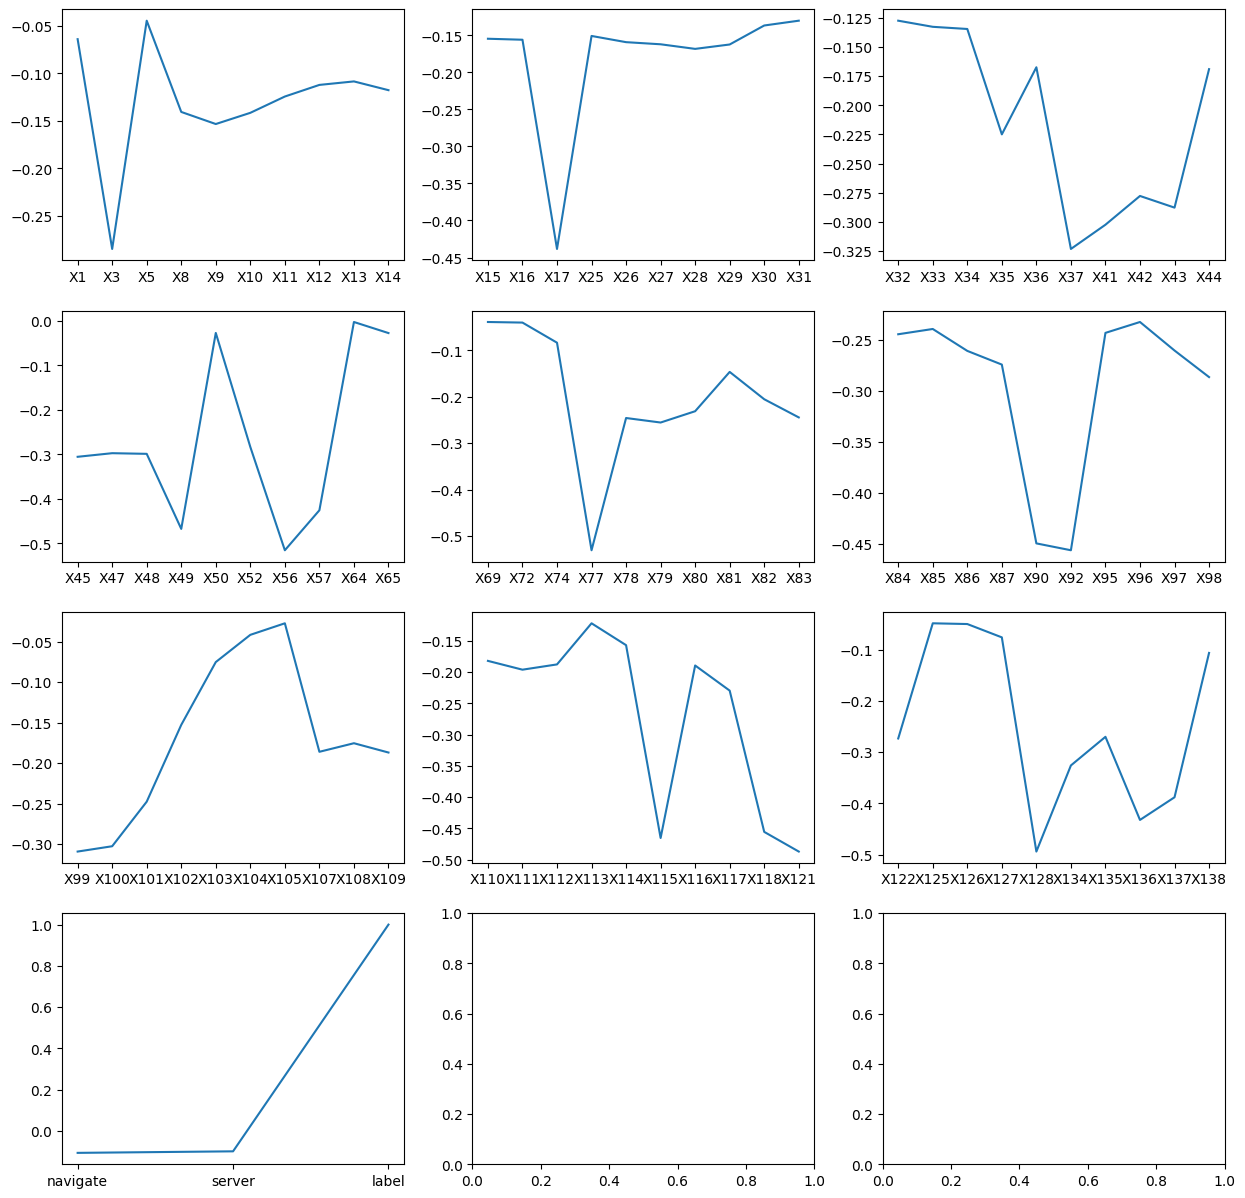

In [68]:
# prompt: lineplot
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
sns.lineplot(x = cols[0:10], y = corr_list[0:10],ax=axes[0,0])
sns.lineplot(x = cols[10:20], y = corr_list[10:20],ax=axes[0,1])
sns.lineplot(x = cols[20:30], y = corr_list[20:30],ax=axes[0,2])
sns.lineplot(x = cols[30:40], y = corr_list[30:40],ax=axes[1,0])
sns.lineplot(x = cols[40:50], y = corr_list[40:50],ax=axes[1,1])
sns.lineplot(x = cols[50:60], y = corr_list[50:60],ax=axes[1,2])
sns.lineplot(x = cols[60:70], y = corr_list[60:70],ax=axes[2,0])
sns.lineplot(x = cols[70:80], y = corr_list[70:80],ax=axes[2,1])
sns.lineplot(x = cols[80:90], y = corr_list[80:90],ax=axes[2,2])
sns.lineplot(x = cols[90:100], y = corr_list[90:100],ax=axes[3,0])
plt.show()


In [69]:
X=train_norm

In [70]:
Y=train_new1['label']

Splitting Data into test and train

In [71]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=43)

In [72]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(59063, 92)
(25314, 92)
(59063,)
(25314,)


In [73]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)
model=log_reg.fit(X_train, Y_train)

In [74]:
coefficients = model.coef_
print(coefficients)

[[ 3.70621667e-02 -1.30520135e+00 -1.17102898e+00  1.15558868e+00
   1.00084092e+00  1.17394838e-01  1.12801868e+00  6.77826297e-01
   6.43198720e-01 -1.07590478e-02  5.26426210e-01  1.53679933e+00
   5.99908537e-02 -2.39846004e-01  2.35105523e-01 -2.25269139e-01
   1.63160122e+00  9.01652088e-01  1.11800181e-01 -3.92779207e-01
   1.07447995e+00  9.45946770e-01  8.69574200e-01 -5.14869866e+00
  -4.17337008e-01  2.14997224e+00 -1.09572557e+00 -1.23396856e+00
  -2.24465397e+00 -7.75348259e-01 -1.49166453e+00 -1.07650648e+00
  -1.25515980e+00 -7.86259754e-01 -7.43553387e-02  2.91646060e+00
  -2.35960739e+00  1.28845955e+00  1.76742326e-05  2.23132403e-01
   2.31000869e-01  5.43479391e-02 -4.12304188e-01 -2.26121052e+00
  -5.37613051e-01 -8.96959628e-01 -1.25506989e+00 -8.19792772e-01
  -4.80108341e-01 -4.72653287e-01 -5.82233864e-01 -6.55002786e-01
  -1.55142876e+00 -1.04741396e+00  7.64540132e-01 -5.72097806e+00
   1.18900010e+00 -9.51031976e-01 -8.65386720e-01 -1.02882464e+00
  -1.41151

In [75]:
print("Feature Importance:")
for i, feature in enumerate(X_train.columns.to_list()):
    importance = np.abs(coefficients[:, i])
    print(f"{feature}: {importance[0]}")


Feature Importance:
X1: 0.037062166687359344
X3: 1.305201350582076
X5: 1.1710289774147478
X8: 1.1555886760416032
X9: 1.0008409169945618
X10: 0.11739483809879367
X11: 1.1280186787726882
X12: 0.6778262969907082
X13: 0.6431987195285921
X14: 0.010759047829369268
X15: 0.5264262101982868
X16: 1.5367993322729736
X17: 0.05999085368600174
X25: 0.23984600393409897
X26: 0.23510552304229557
X27: 0.22526913932310902
X28: 1.6316012186013258
X29: 0.9016520883816579
X30: 0.11180018128077254
X31: 0.3927792067889764
X32: 1.074479951717787
X33: 0.945946769736775
X34: 0.8695741999406839
X35: 5.148698657431757
X36: 0.4173370075960141
X37: 2.1499722383308457
X41: 1.0957255747961365
X42: 1.233968558856196
X43: 2.244653967919892
X44: 0.7753482587541695
X45: 1.4916645318513109
X47: 1.0765064751691336
X48: 1.255159802164534
X49: 0.7862597535085778
X50: 0.07435533871847039
X52: 2.9164605966601047
X56: 2.3596073918574922
X57: 1.2884595513865351
X64: 1.767423263767011e-05
X65: 0.22313240278204813
X69: 0.2310008690

In [76]:
from sklearn.metrics import accuracy_score
accuracy = model.score(X_test, Y_test)
print(f"\nAccuracy: {accuracy:.2f}")


Accuracy: 0.87


In [77]:
import xgboost as xgb
# Define parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # Binary classification
    'eval_metric': 'logloss',         # Evaluation metric
    'eta': 0.1,                        # Learning rate
    'max_depth': 3,                    # Maximum depth of tree
    'min_child_weight': 1,             # Minimum sum of instance weight needed in a child
    'gamma': 0,                        # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': 0.8,                  # Subsample ratio of the training instances
    'colsample_bytree': 0.8,           # Subsample ratio of columns when constructing each tree
    'scale_pos_weight': 1,             # Control the balance of positive and negative weights
    'seed': 42                         # Random seed
}

# Create XGBoost classifier
clf = xgb.XGBClassifier(**params)

# Train the classifier
clf.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8785257169945485


In [78]:
test_norm.shape

(35982, 92)

In [79]:
label_new=pd.DataFrame(clf.predict(test_norm),columns=['label'])

In [80]:
X_test_predicted=pd.concat([test_norm,label_new],axis=1)

In [81]:
X_test_predicted=pd.concat([test_new1['ID'],X_test_predicted],axis=1)

In [82]:
X_test_predicted

,ID,X1,X3,X5,X8,X9,X10,X11,X12,X13,...,X127,X128,X134,X135,X136,X137,X138,navigate,server,label
0,17547,0.090909,0.000000,0.181818,0.004040,0.052083,0.149682,0.012750,0.016018,0.023324,...,0.093264,0.011688,0.021277,0.075758,0.019608,0.069767,0.086957,0.000000,0.000000,0
1,140449,0.000000,0.000000,0.000000,0.004714,0.006250,0.012739,0.003643,0.000000,0.014577,...,0.082902,0.000570,0.042553,0.015152,0.019608,0.023256,0.173913,0.010753,0.004380,1
2,182658,0.333333,0.001049,0.090909,0.042424,0.002083,0.019108,0.012750,0.029748,0.052478,...,0.077720,0.003136,0.021277,0.045455,0.000000,0.000000,0.260870,0.000000,0.000000,1
3,149652,0.000000,0.000000,0.000000,0.005387,0.016667,0.028662,0.000000,0.032037,0.052478,...,0.077720,0.000570,0.042553,0.000000,0.000000,0.023256,0.260870,0.021505,0.005839,1
4,106304,0.333333,0.001049,0.181818,0.000000,0.010417,0.009554,0.001821,0.006865,0.008746,...,0.031088,0.000000,0.000000,0.015152,0.019608,0.023256,0.043478,0.027021,0.016485,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35977,102422,0.000000,0.001049,0.000000,0.006061,0.012500,0.025478,0.016393,0.002288,0.052478,...,0.031088,0.000570,0.042553,0.000000,0.000000,0.023256,0.086957,0.000000,0.000000,1
35978,129387,0.358974,0.000000,0.181818,0.003367,0.008333,0.025478,0.010929,0.027460,0.008746,...,0.005181,0.005131,0.021277,0.015152,0.019608,0.023256,0.043478,0.027021,0.016485,1
35979,131835,0.000000,0.000000,0.000000,0.004040,0.016667,0.009554,0.014572,0.016018,0.049563,...,0.020725,0.001425,0.042553,0.000000,0.019608,0.000000,0.260870,0.027021,0.016485,1
35980,68715,0.166667,0.023085,0.454545,0.000673,0.043750,0.019108,0.012750,0.036613,0.052478,...,0.077720,0.002281,0.000000,0.045455,0.000000,0.000000,0.347826,0.000000,0.000000,1


In [83]:
submission=X_test_predicted[['ID','label']]

In [84]:
submission.to_csv("/kaggle/working/submission.csv",header=True,index=False)

In [85]:
submission.shape

(35982, 2)